# 1. Import Libraries

**Let us import the required libraries.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy.stats import ttest_ind

pd.options.display.max_columns = None

import warnings
warnings.filterwarnings('ignore')

# 2. Data Preparation

#### Read the dataset and print the first five observations.

In [2]:
# load the csv file
df_train = pd.read_csv('Data_train.csv')

# display first five observations using head()
df_train.head()

ID  Asst_Reg GGGrade Experience       Validation  Yearly Income  \
0   95074    421802      II     >10yrs            Vfied      633600.00   
1  134131   3964312      IV       7yrs  Source Verified       85483.20   
2   92602   4247560     III       <1yr  Source Verified       79200.00   
3   22591    197179     III       <1yr            Vfied       61600.00   
4  125060   4646684       V       2yrs  Source Verified       68053.92   

  Home Status  Unpaid 2 years  Already Defaulted       Designation  \
0    MOR??AGE               0                  0   GLENDALE NISSAN   
1        REN?               0                  0  Business Teacher   
2        REN?               0                  0            driver   
3        REN?               0                  0          AvePoint   
4        REN?               0                  0       Lead Tester   

   Debt to Income  Postal Code  Lend Amount  Deprecatory Records  \
0         12.5496      91300.0     42023.25                    0   
1          9.0048      27400.0     38133.00                    0   
2         24.9144      32800.0     17100.00                    0   
3         16.5816       7000.0      5130.00                    0   
4         40.0512      70800.0     19665.00                    0   

   Interest Charged  Usage Rate  Inquiries  Present Balance  Gross Collection  \
0             15.39      88.924          3        607161.90               0.0   
1              9.94     102.856          0        269234.06               0.0   
2             22.35      60.372          0         22476.53               0.0   
3             10.36     116.272          1         15242.09               0.0   
4             13.68     127.280          1         65433.94               0.0   

   Sub GGGrade File Status       State  Account Open  Total Unpaid CL  \
0           19  fully paid  California            17          58598.0   
1           30       whole          NC            15          18924.0   
2           25       whole     Florida             7          15604.0   
3           22  fully paid   NewJersey             9          22410.0   
4           32  fully paid          LA            10          36022.0   

  Duration  Unpaid Amount               Reason Claim Type  Due Fee  \
0  3 years       31216.05  debt  consolidation          I      0.0   
1  5 years       11660.49  debt  consolidation          I      0.0   
2  5 years        5637.87      major  purchase          I      0.0   
3  3 years       15607.17      major  purchase          I      0.0   
4  5 years       27472.86  debt  consolidation          I      0.0   

   Loan/No Loan  
0             0  
1             0  
2             0  
3             1  
4             0

In [3]:
df_test = pd.read_csv('Data_Test.csv')
df_test.head()

ID  Asst_Reg GGGrade Experience       Validation  Yearly Income  \
0  198980   1773284      II       2yrs  Source Verified      140800.00   
1  167688   5298273      II     >10yrs            Vfied      146080.00   
2  198768    189781      VI     >10yrs            Vfied      202222.24   
3  192564   1530906      II     >10yrs            Vfied      105600.00   
4  151199   4410316     III       4yrs        Not Vfied      151360.00   

  Home Status  Unpaid 2 years  Already Defaulted                  Designation  \
0         OWN               0                  0                    processor   
1    MOR??AGE               0                  0  Speech Language Pathologist   
2    MOR??AGE               0                  0                     Raytheon   
3    MOR??AGE               1                  0  Computer/Network Technician   
4    MOR??AGE               0                  0                     NDE Tech   

   Debt to Income  Postal Code  Lend Amount  Deprecatory Records  \
0         16.9176      90600.0     17955.00                    0   
1         28.6944      32300.0     59850.00                    0   
2         51.1560      88000.0     59850.00                    0   
3         27.0144      19900.0     19323.00                    0   
4         10.3824      34900.0     25350.75                    1   

   Interest Charged  Usage Rate  Inquiries  Present Balance  Gross Collection  \
0              8.88      78.432          1         59769.30               0.0   
1             10.10      76.368          1        532962.13               0.0   
2             19.30     157.552          2        288816.48               0.0   
3              8.82      32.852          2        424664.30               0.0   
4             13.52     108.532          1        251704.07               0.0   

   Sub GGGrade File Status       State  Account Open  Total Unpaid CL  \
0           17  fully paid  California            23          33532.0   
1           19       whole     Florida            17         149234.0   
2           37       whole          NM            15          70218.0   
3           19  fully paid          DE            18          79182.0   
4           25  fully paid     Florida             7          13612.0   

  Duration  Unpaid Amount               Reason Claim Type  Due Fee  
0  3 years       15755.94      major  purchase          I      0.0  
1  5 years       68237.55  debt  consolidation          I      0.0  
2  5 years       66272.76  debt  consolidation          I      0.0  
3  3 years       15595.20         credit  card          I      0.0  
4  3 years        8850.96  debt  consolidation          I      0.0

**Now let's check number of observations and attributes**

In [4]:
print("Number of observations X_train(rows): ",df_train.shape[0])
print("Number of attributes y_train(columns): ",df_train.shape[1])
print('\n')
print("Number of observations X_test(rows): ",df_test.shape[0])
print("Number of attributes y_test(columns): ",df_test.shape[1])


Number of observations X_train(rows):  87500
Number of attributes y_train(columns):  30


Number of observations X_test(rows):  37500
Number of attributes y_test(columns):  29


**Interpretation:** The data has 87500 observations and 30 variables.

**Check the data type of each variable.**

In [5]:
df_train.dtypes

ID                       int64
Asst_Reg                 int64
GGGrade                 object
Experience              object
Validation              object
Yearly Income          float64
Home Status             object
Unpaid 2 years           int64
Already Defaulted        int64
Designation             object
Debt to Income         float64
Postal Code            float64
Lend Amount            float64
Deprecatory Records      int64
Interest Charged       float64
Usage Rate             float64
Inquiries                int64
Present Balance        float64
Gross Collection       float64
Sub GGGrade              int64
File Status             object
State                   object
Account Open             int64
Total Unpaid CL        float64
Duration                object
Unpaid Amount          float64
Reason                  object
Claim Type              object
Due Fee                float64
Loan/No Loan             int64
dtype: object

**Interpretation:**
* as `Loan/No Loan` column is categorical variable(target variable)
* so we will convert it to object type

In [6]:
df_train['Loan/No Loan'] = df_train['Loan/No Loan'].astype('O')
df_train['Inquiries'] = df_train['Inquiries'].astype('O')
df_train['Already Defaulted'] = df_train['Already Defaulted'].astype('O')

In [7]:
df_test['Inquiries'] = df_test['Inquiries'].astype('O')
df_test['Already Defaulted'] = df_test['Already Defaulted'].astype('O')

In [8]:
df_train.rename(columns = {'Loan/No Loan' : 'Loan Status'}, inplace = True)

### Unique values in categorical variables

In [9]:
# categorical columns and their unique values
cat_col = df_train.select_dtypes('O')
for col in cat_col:
    print(col, ':', cat_col[col].unique())

GGGrade : ['II' 'IV' 'III' 'V' 'VII' 'VI' 'I']
Experience : ['>10yrs' '7yrs' '<1yr' '2yrs' '1yrs' '4yrs' '9yrs' '6yrs' '5yrs' '8yrs'
 '3yrs']
Validation : ['Vfied' 'Source Verified' 'Not Vfied']
Home Status : ['MOR??AGE' 'REN?' 'OWN' 'OTHER' 'NONE']
Already Defaulted : [0 1 2 6 5 4 3]
Designation : ['GLENDALE NISSAN' 'Business Teacher' 'driver' ... 'Interface Coordinator'
 'PARTS CLERK' 'Outside sales rep']
Inquiries : [3 0 1 2 4 5 6 8]
File Status : ['fully paid' 'whole']
State : ['California' 'NC' 'Florida' 'NewJersey' 'LA' 'TX' 'CT' 'MI' 'OR' 'AR'
 'Newyork' 'MT' 'CO' 'Ohio' 'NM' 'MN' 'GA' 'WA' 'Maryland' 'AL' 'SC' 'PA'
 'AZ' 'UT' 'MA' 'VA' 'IL' 'WI' 'NV' 'HI' 'RI' 'TN' 'OK' 'VT' 'IN' 'AK'
 'MO' 'NE' 'NH' 'DC' 'WV' 'MS' 'KY' 'KS' 'DE' 'ND' 'SD' 'WY' 'ME']
Duration : ['3 years' '5 years']
Reason : ['debt  consolidation' 'major  purchase' 'other' 'credit  card' 'car'
 'home  improvement' 'small  business' 'moving' 'vacation' 'medical'
 'wedding' 'house' 'renewable  energy']
Claim Type

**Interpretation:**
 The feature `Experience`, `Home Status` and `Reason` are not properly formatted, so we will convert them

In [10]:
df_train['Experience'] = df_train['Experience'].replace({'yrs':'','\<1': 0,'\>10':11, 'yr':''}, regex = True)
# df_train["Experience"] = pd.to_numeric(df_loan["Experience"].apply(lambda x:0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))
df_train['Experience'] = df_train['Experience'].apply(lambda x:int(x))

df_train['Home Status'] = df_train['Home Status'].replace({'MOR??AGE':'MORTGAGE', 'REN?':'RENT'})
df_train['Duration'] = df_train['Duration'].replace({'years': ''}, regex = True)
df_train['Reason'] = df_train['Reason'].str.replace('  ' , ' ')

In [11]:
df_test['Experience'] = df_test['Experience'].replace({'yrs':'','\<1': 0,'\>10':11, 'yr':''}, regex = True)
# df_train["Experience"] = pd.to_numeric(df_loan["Experience"].apply(lambda x:0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))
df_test['Experience'] = df_test['Experience'].apply(lambda x:int(x))

df_test['Home Status'] = df_test['Home Status'].replace({'MOR??AGE':'MORTGAGE', 'REN?':'RENT'})
df_test['Duration'] = df_test['Duration'].replace({'years': ''}, regex = True)
df_test['Reason'] = df_test['Reason'].str.replace('  ' , ' ')

### Remove insignificant variables

In [12]:
df_train.drop('Designation', axis = 1, inplace = True)

In [13]:
df_test.drop('Designation', axis = 1, inplace = True)

**Catgeorical columns and % observations in each category**

In [14]:
for col in df_train.select_dtypes('O'):
    print('feature:')
    print(df_train.select_dtypes('O')[col].value_counts(normalize = True).mul(100).round(2).astype(str) + '%', '\n')

feature:
II     28.53%
III    28.17%
I       16.2%
IV     15.85%
V       8.18%
VI      2.51%
VII     0.57%
Name: GGGrade, dtype: object 

feature:
Source Verified    39.43%
Vfied              30.45%
Not Vfied          30.12%
Name: Validation, dtype: object 

feature:
MORTGAGE    50.47%
RENT         39.9%
OWN          9.62%
OTHER        0.01%
NONE          0.0%
Name: Home Status, dtype: object 

feature:
0    99.47%
1      0.5%
2     0.03%
3      0.0%
4      0.0%
5      0.0%
6      0.0%
Name: Already Defaulted, dtype: object 

feature:
0    56.97%
1    26.97%
2    10.33%
3     4.04%
4     1.21%
5     0.36%
6     0.11%
8      0.0%
Name: Inquiries, dtype: object 

feature:
whole         52.91%
fully paid    47.09%
Name: File Status, dtype: object 

feature:
California    14.43%
Newyork        8.24%
TX             8.15%
Florida        6.64%
IL              4.0%
NewJersey      3.72%
PA             3.62%
Ohio           3.39%
GA             3.34%
VA             2.91%
NC             2.88%
MI  

**Interpretation:**
* In column `Home Status`, percentge obeseravtions for category 'OTHER' and 'NONE' are almost zero
* In columns `Already Defaulted`, almost all the observations are falling under category '0', it might mean that they haven't defaulted before

In [15]:
# numerical columns
num_col = df_train.select_dtypes(np.number)
num_col.columns

Index(['ID', 'Asst_Reg', 'Experience', 'Yearly Income', 'Unpaid 2 years',
       'Debt to Income', 'Postal Code', 'Lend Amount', 'Deprecatory Records',
       'Interest Charged', 'Usage Rate', 'Present Balance', 'Gross Collection',
       'Sub GGGrade', 'Account Open', 'Total Unpaid CL', 'Unpaid Amount',
       'Due Fee'],
      dtype='object')

**let's see if there are any duplicated values**

In [16]:
df_train.duplicated().sum()

0

In [46]:
# there are no duplicate values

# Exploratory Data Analysis

In [17]:
df_train.describe()

ID      Asst_Reg    Experience  Yearly Income  \
count   87500.000000  8.750000e+04  87500.000000   8.192500e+04   
mean    83946.253509  3.798914e+06      6.410743   1.348596e+05   
std     36100.102950  2.289038e+06      4.056828   9.882473e+04   
min     21560.000000  2.484700e+04      0.000000   8.800000e+03   
25%     52616.750000  1.483874e+06      3.000000   8.324659e+04   
50%     83900.000000  4.132010e+06      7.000000   1.144000e+05   
75%    115261.250000  5.952909e+06     11.000000   1.601600e+05   
max    146559.000000  7.351847e+06     11.000000   8.264031e+06   

       Unpaid 2 years  Debt to Income   Postal Code   Lend Amount  \
count    87500.000000    84011.000000  86111.000000  87500.000000   
mean         0.332937       30.942660  51155.385491  25920.535680   
std          0.876080       14.079813  31211.229930  14433.837213   
min          0.000000        0.000000   1000.000000   1710.000000   
25%          0.000000       20.428800  22900.000000  15048.000000   
50%          0.000000       30.139200  47700.000000  23940.000000   
75%          0.000000       40.908000  80200.000000  34200.000000   
max         18.000000      639.290400  99900.000000  59850.000000   

       Deprecatory Records  Interest Charged    Usage Rate  Present Balance  \
count         87500.000000      87500.000000  87500.000000     8.750000e+04   
mean              0.202400         16.518375     95.517348     2.363895e+05   
std               0.646414          4.902011     40.554035     2.550568e+05   
min               0.000000          8.000000      0.000000     0.000000e+00   
25%               0.000000         12.310000     66.048000     5.173493e+04   
50%               0.000000         16.490000     97.008000     1.388062e+05   
75%               0.000000         20.770000    126.592000     3.534755e+05   
max              86.000000         25.000000   1534.756000     5.629234e+06   

       Gross Collection   Sub GGGrade  Account Open  Total Unpaid CL  \
count      87500.000000  87500.000000   87500.00000     8.331400e+04   
mean          39.461697     22.024891      12.77944     5.326864e+04   
std          391.919578      6.452697       5.37116     5.325551e+04   
min            0.000000     11.000000       2.00000     3.320000e+02   
25%            0.000000     17.000000       9.00000     2.324000e+04   
50%            0.000000     21.000000      12.00000     3.967400e+04   
75%            0.000000     26.000000      16.00000     6.640000e+04   
max        26308.470000     45.000000      83.00000     1.710630e+06   

       Unpaid Amount       Due Fee  
count   8.264800e+04  87500.000000  
mean    2.955649e+04      0.316407  
std     3.745625e+04      3.546087  
min     0.000000e+00      0.000000  
25%     1.144674e+04      0.000000  
50%     2.089278e+04      0.000000  
75%     3.644908e+04      0.000000  
max     1.338778e+06    169.050000

**Interpretation:**
* `Asst_Reg` has high std value, as the values are spread across wide range
* `Yearly Income` is also spread across wide range

In [18]:
df_train.drop('Loan Status', axis =1).describe(include = 'O')

GGGrade       Validation Home Status  Already Defaulted  Inquiries  \
count    87500            87500       87500              87500      87500   
unique       7                3           5                  7          8   
top         II  Source Verified    MORTGAGE                  0          0   
freq     24966            34504       44160              87035      49853   

       File Status       State Duration              Reason Claim Type  
count        87500       87500    87500               87500      87500  
unique           2          49        2                  13          2  
top          whole  California       3   debt consolidation          I  
freq         46300       12625    60061               52559      87454

**Interpretation:**
* In `House Status`, 'Mortgage' is the highest occuring category and around half of the population(50% of the people) has home mortgage
* In `Already Defaulted`, around 99% of the people haven't defaulted before in any of the loans
* In this dataset most of the people are from 'California'
* the major reason is 'debt consolidation' as it is the most frequent class with almost 60% population
* most of the applicants have borrower `claim type`, as individual account. Around 99% of the population has individual account type

**Target variable**

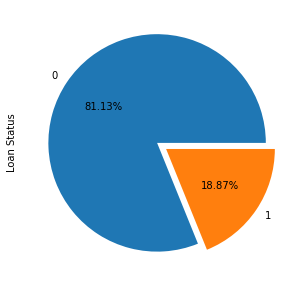

In [19]:
plt.figure(figsize = (7,5))
df_train['Loan Status'].value_counts().plot(kind="pie",autopct="%.2f%%",explode=[0,0.1])
plt.show()

**Interpretation:**
* around 81% of the population hasn't defaulted
* around 19% of the population has defaulted
* Data is pretty imbalance, we will have to deal with data imbalance


**Distribution of numeric independent variables.**

In [20]:
df_num = df_train.select_dtypes(np.number)
df_num.shape

(87500, 18)

Skewness: 
 ID                      0.004884
Asst_Reg               -0.086652
Experience             -0.143267
Yearly Income          16.865735
Unpaid 2 years          5.000587
Debt to Income          1.169490
Postal Code             0.054740
Lend Amount             0.640077
Deprecatory Records    30.987894
Interest Charged        0.000128
Usage Rate              0.343646
Present Balance         2.436750
Gross Collection       19.414597
Sub GGGrade             0.550063
Account Open            1.284886
Total Unpaid CL         5.906244
Unpaid Amount           8.868174
Due Fee                16.587386
dtype: float64


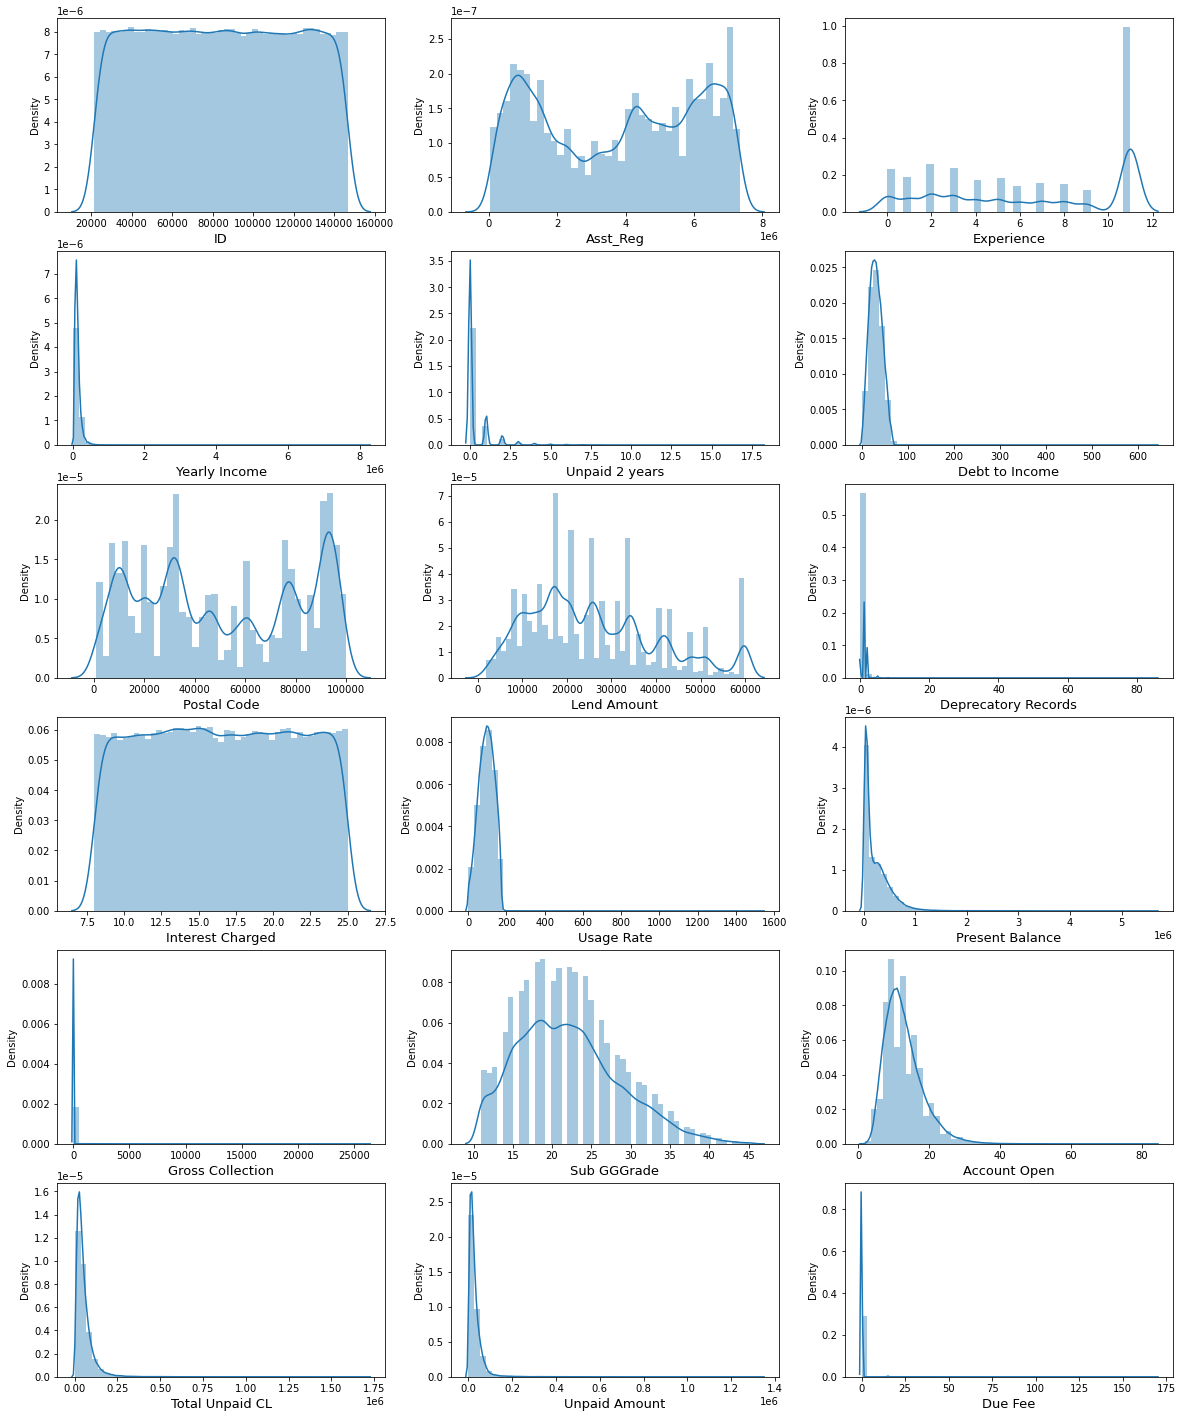

In [21]:
plt.figure(figsize=(20,25))
plot_num=1
for col in df_num.columns:
    ax=plt.subplot(6,3,plot_num)
    sns.distplot(df_num[col])
    plt.xlabel(col,fontsize=13)
    plot_num+=1

print('Skewness: \n', df_num.skew())


**Interpretation:**
* above plots show that, some columns are highly right skewed.    

In [22]:
df_cat = df_train.select_dtypes('O')
df_cat.shape

(87500, 11)

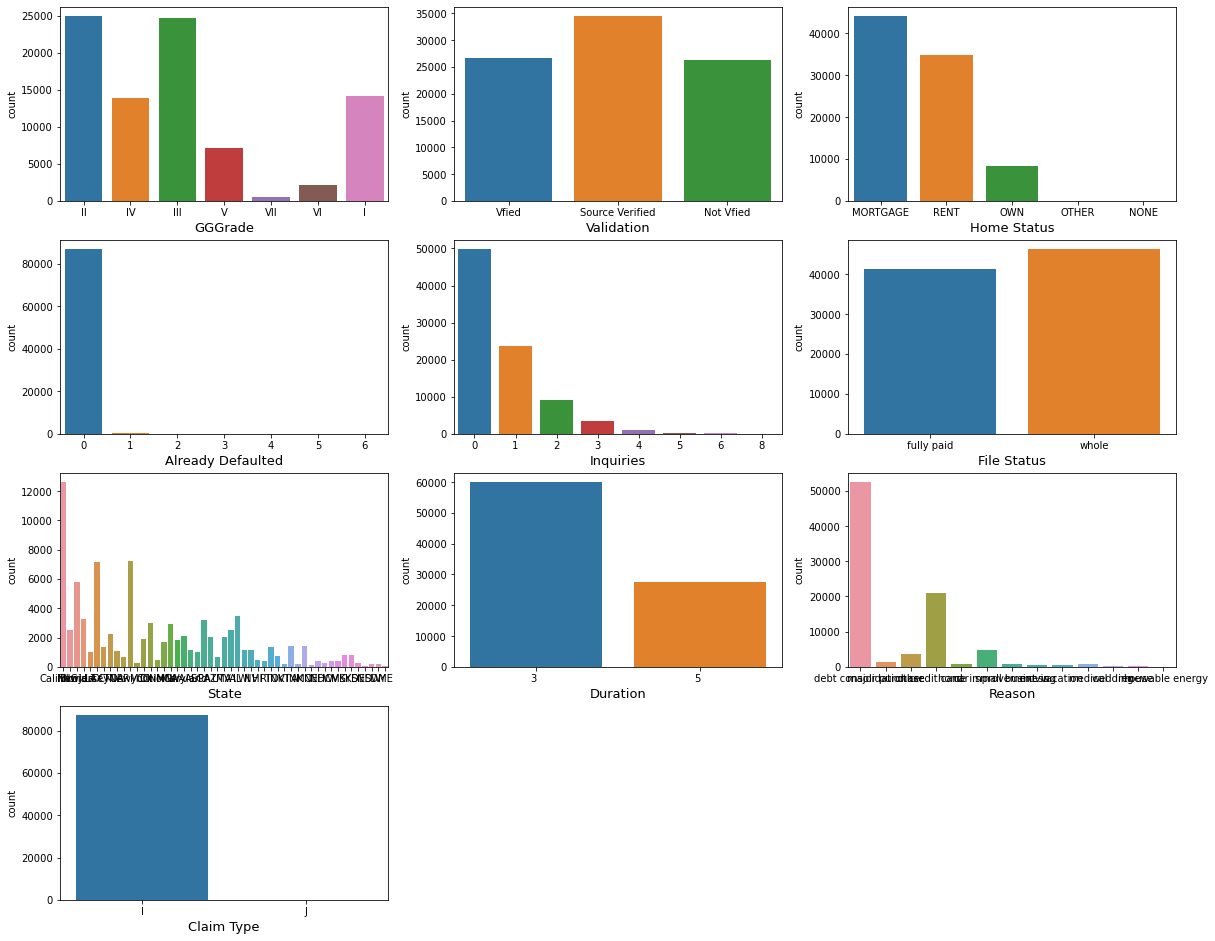

In [23]:
plt.figure(figsize=(20,25))
plot_num=1
for col in df_cat.drop('Loan Status',axis = 1).columns:
    ax=plt.subplot(6,3,plot_num)
    sns.countplot(df_cat.drop('Loan Status',axis = 1)[col])
    plt.xlabel(col,fontsize=13)
    plot_num+=1


**Interpretation:**
* lot of population has more than 10 years of experience
* lot of people has bought the house on mortgage
* almost all of the population hasn't defaulted in any of the loans
* lot of people hasn't been inquired in the last 6 months
* as the `state` column is not properly visible, so it is hard to make inference from it, but we can see lot of people are from california
* approximately 50000 people has taken loan for duration 3 years and rest have taken loan for duration of 5 years
* debt consolidation is the major reason for loan application
* almost all of the population prefer individual account over joint account as a borrower claim type

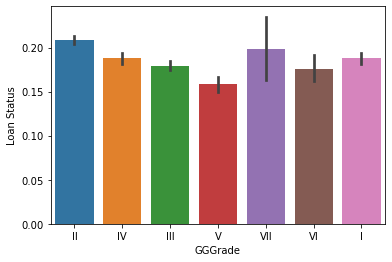

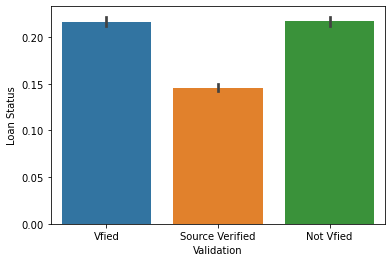

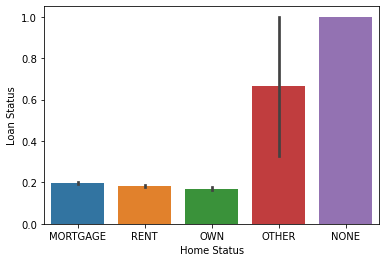

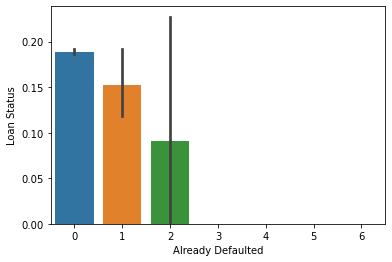

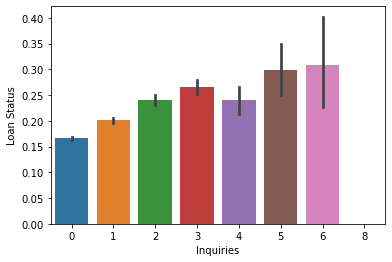

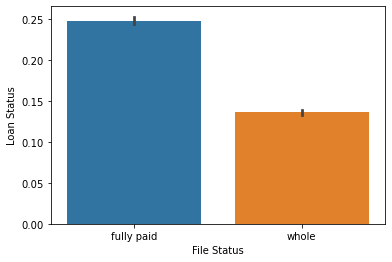

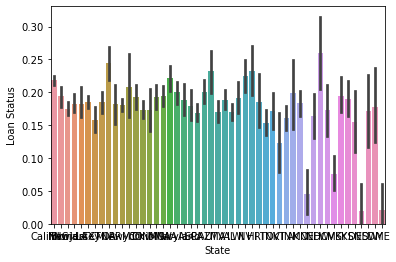

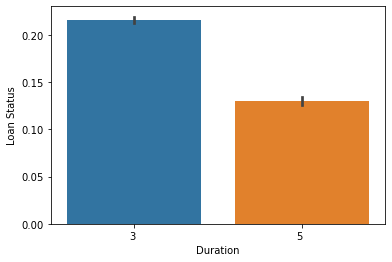

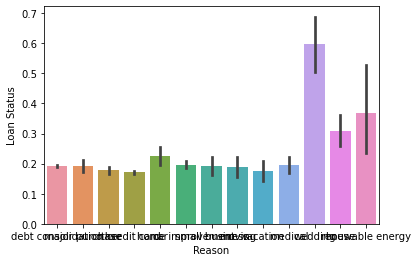

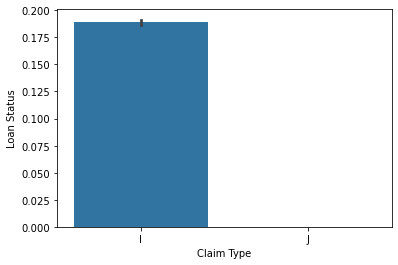

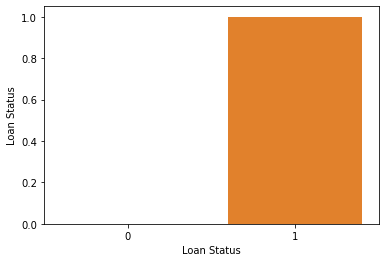

In [24]:

for col in df_cat:
    sns.barplot(x = col, y = 'Loan Status', data = df_train)
    plt.show()

**Interpretation:**
* For features `Inquiries`,`State` and `Experience` deafult ratio is almost constant for all the variables, so we will eliminate them in future

**Bivariate Analysis**

In [25]:
df_train = df_train[~((df_train['Home Status'] == 'OTHER') | (df_train['Home Status'] == 'NONE'))]

In [26]:
# Pivot_table_ count
def pivot_count(a, b, c):
    pivot_tab = df_train.pivot_table(
        columns=a,
        index=b,
        values=c, aggfunc=np.sum)
#     display(pivot_tab)
# Display pivot_table
    pivot_tab.sort_values(by=[b], ascending=True).plot(kind="bar", title=(b), figsize=(6,4),fontsize = 12);

**Features: Home Status and GGGrade**

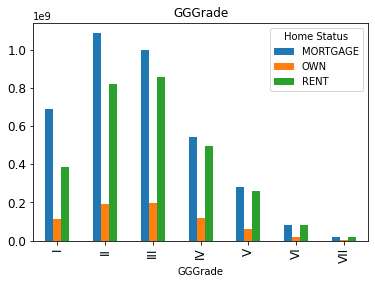

In [27]:
pivot_count('Home Status', 'GGGrade', 'ID')

**Interpretation:**
* When the Grade decreases, `Home Status` shifts from Mortgage to Rent
* we can observe that, in the Grades II, III, IV on an average percentage of people owning a house is greater than rest of the Grades 

**Feature: GGGrade** 

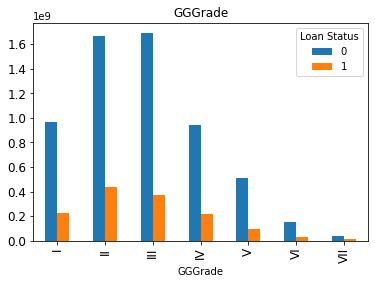

In [28]:
pivot_count('Loan Status', 'GGGrade', 'ID')

**Interpretation:**
* In the upper grade class, the highest number of non-default loans has happend
* as we go towrads lower class, the number of defaults and non-default tend to have same count

In [29]:
def num_var(x):
    def_arr = df_train[df_train['Loan Status'] == 0].loc[:,x]
    not_def_arr = df_train[df_train['Loan Status'] == 1].loc[:,x]
    
    a = np.array(def_arr)
    b = np.array(not_def_arr)
    
    np.warnings.filterwarnings('ignore')
    
    plt.hist(a, bins=40, density=True, color="g", alpha = 0.6, label='Not-default', align="left")
    plt.hist(b, bins=40, density=True, color="r", alpha = 0.6, label='Default', align="right")
    plt.legend(loc='upper right')
    plt.title(x, fontsize=10, loc="right")
    plt.xlabel('Relative frequency')
    plt.ylabel('Absolute frequency')
    plt.show()

**Feature: Yearly Income**

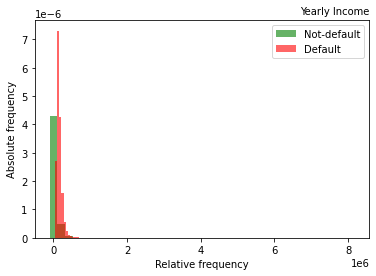

In [30]:
num_var('Yearly Income')

**Interpretation:**
* from the above plot we can see that, as the `Yearly Income` increases, people tend to default 

### Features vs Target variable

In [31]:
plt.figure(figsize=(20,25))
# plot_num=1
for col in df_cat.drop('Loan Status',axis = 1).columns:
#     ax=plt.subplot(6,3,plot_num)
    cat_plot=pd.DataFrame(df_train.groupby(col)['Loan Status'].value_counts())
    cat_plot['Percentage'] = df_train.groupby(col)['Loan Status'].value_counts().groupby(level = 0).apply(lambda x: 100 * x / float(x.sum())).values
    cat_plot.columns = ['count', 'percentage']
    cat_plot.reset_index(level = ['Loan Status', col],inplace=True)
    fig=px.bar(cat_plot, x=col, y=['count'], color = 'Loan Status' ,text=cat_plot['percentage'].apply(lambda x: '{0:1.2f}%'.format(x)),title= str(col) + ' vs Loan Status')
    fig.show()
    
#     sns.countplot(df_cat.drop('Loan Status',axis = 1)[col])
#     plt.xlabel(col,fontsize=13)

<Figure size 1440x1800 with 0 Axes>

**Interpretation:**
* We can observe, in `GGGrade` grade II is having maximum loan defaulter ratio and grade v is having minumum loan defaulter ratio
* While giving out loan, verified should be taken into consideration, because `source verified` are having minimum loan default ratio
* In `Home Status`, generally people having mortgage have high percentage of defaulters
* More frequently inquired people are likely tend to default
* 'California' is having high number of people taking loan and also highest percentage defaulters
* People who have taken loan for 'car', 'debt consolidation', 'home improvement'small business', etc have high percentage of defaulters

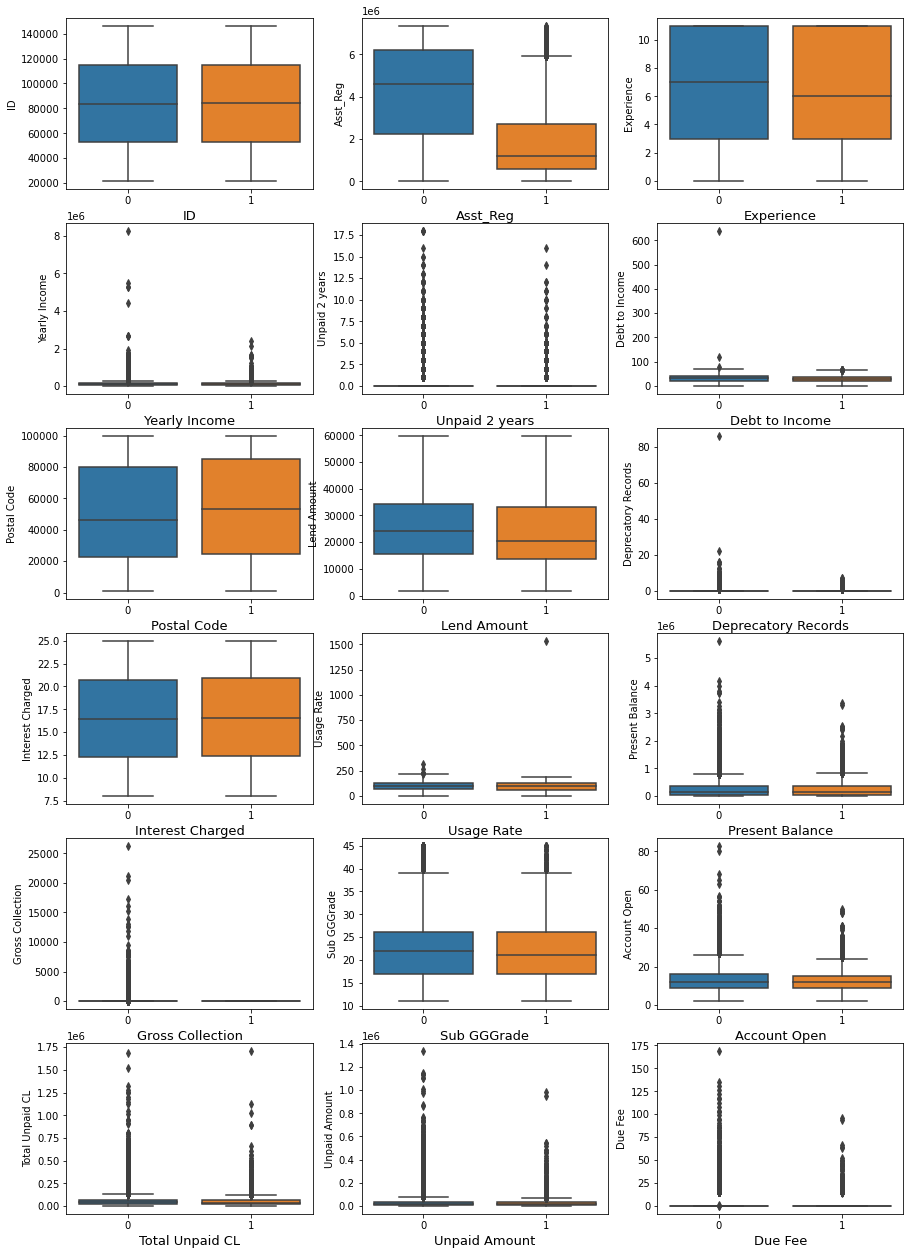

In [32]:
plt.figure(figsize=(15,22))
plot_num=1
for col in df_num.columns:
    ax=plt.subplot(6,3,plot_num)
    sns.boxplot(data = df_train, y = col, x = 'Loan Status')
    plt.xlabel(col,fontsize=13)
    plot_num+=1

In [33]:
for i in range(len(df_num.columns)):
    samp1 = df_train[df_train['Loan Status'] == 0][df_num.columns[i]]
    samp2 = df_train[df_train['Loan Status'] == 1][df_num.columns[i]]
    tstat, pval = ttest_ind(samp1, samp2)
    print('For column',df_num.columns[i],'t-stat =',tstat,'; p value =',pval/2)

For column ID t-stat = -0.19096704993378352 ; p value = 0.4242759257553017
For column Asst_Reg t-stat = 134.28778882811005 ; p value = 0.0
For column Experience t-stat = -0.11563610003108565 ; p value = 0.4539706082588686
For column Yearly Income t-stat = nan ; p value = nan
For column Unpaid 2 years t-stat = 8.87360295951772 ; p value = 3.6057015211656175e-19
For column Debt to Income t-stat = nan ; p value = nan
For column Postal Code t-stat = nan ; p value = nan
For column Lend Amount t-stat = 17.651559234713513 ; p value = 6.538886979566604e-70
For column Deprecatory Records t-stat = 6.201276133638563 ; p value = 2.812824126714494e-10
For column Interest Charged t-stat = -1.7469665017499891 ; p value = 0.04032332890176452
For column Usage Rate t-stat = 9.722064686925215 ; p value = 1.2460746307299145e-22
For column Present Balance t-stat = -3.448652265795957 ; p value = 0.0002818284179841602
For column Gross Collection t-stat = 14.372647354456854 ; p value = 4.3443535582266726e-47


**Interpretation:**
`Yearly Income`, `Debt of Income`, `Lend Amount`, `Deprecatory Records`, `Interest Charged`, `Present Balance`, `Gross Collection`, `Sub GGGrade`, `Account Open`, `Total Unpaid CL`, `Unpaid Amount` and `Due fee` are significant varibles which might be contributing to the model

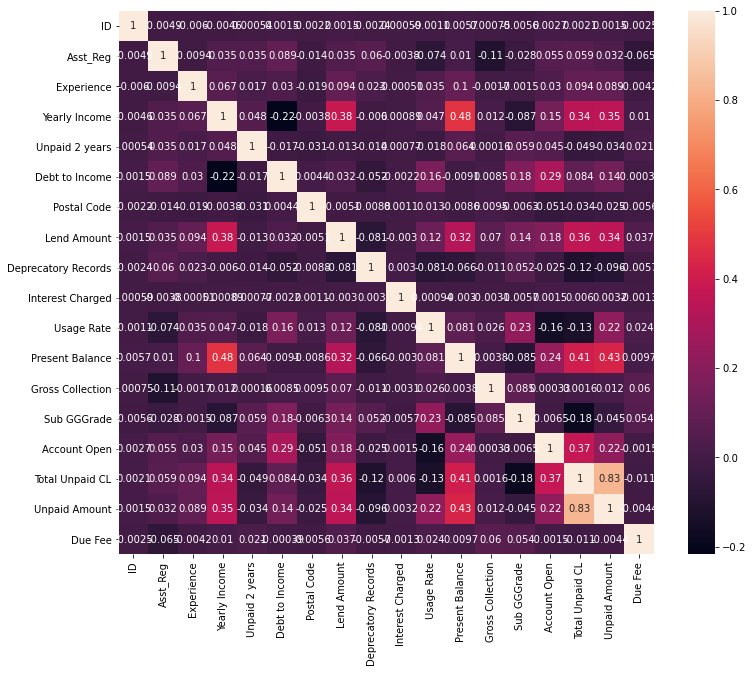

In [34]:
plt.figure(figsize = (12,10))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

**Interpretation:**
* `Unpaid Amount` and `Total Unpaid CL` are highly correlated (high positive correlation)
* `Yearly Income` and `Present Balance` are moderately correlated (moderate positive correlation)
* `Present Balance` and `Unpaid Amount` are moderately correlated (moderate positive correlation)

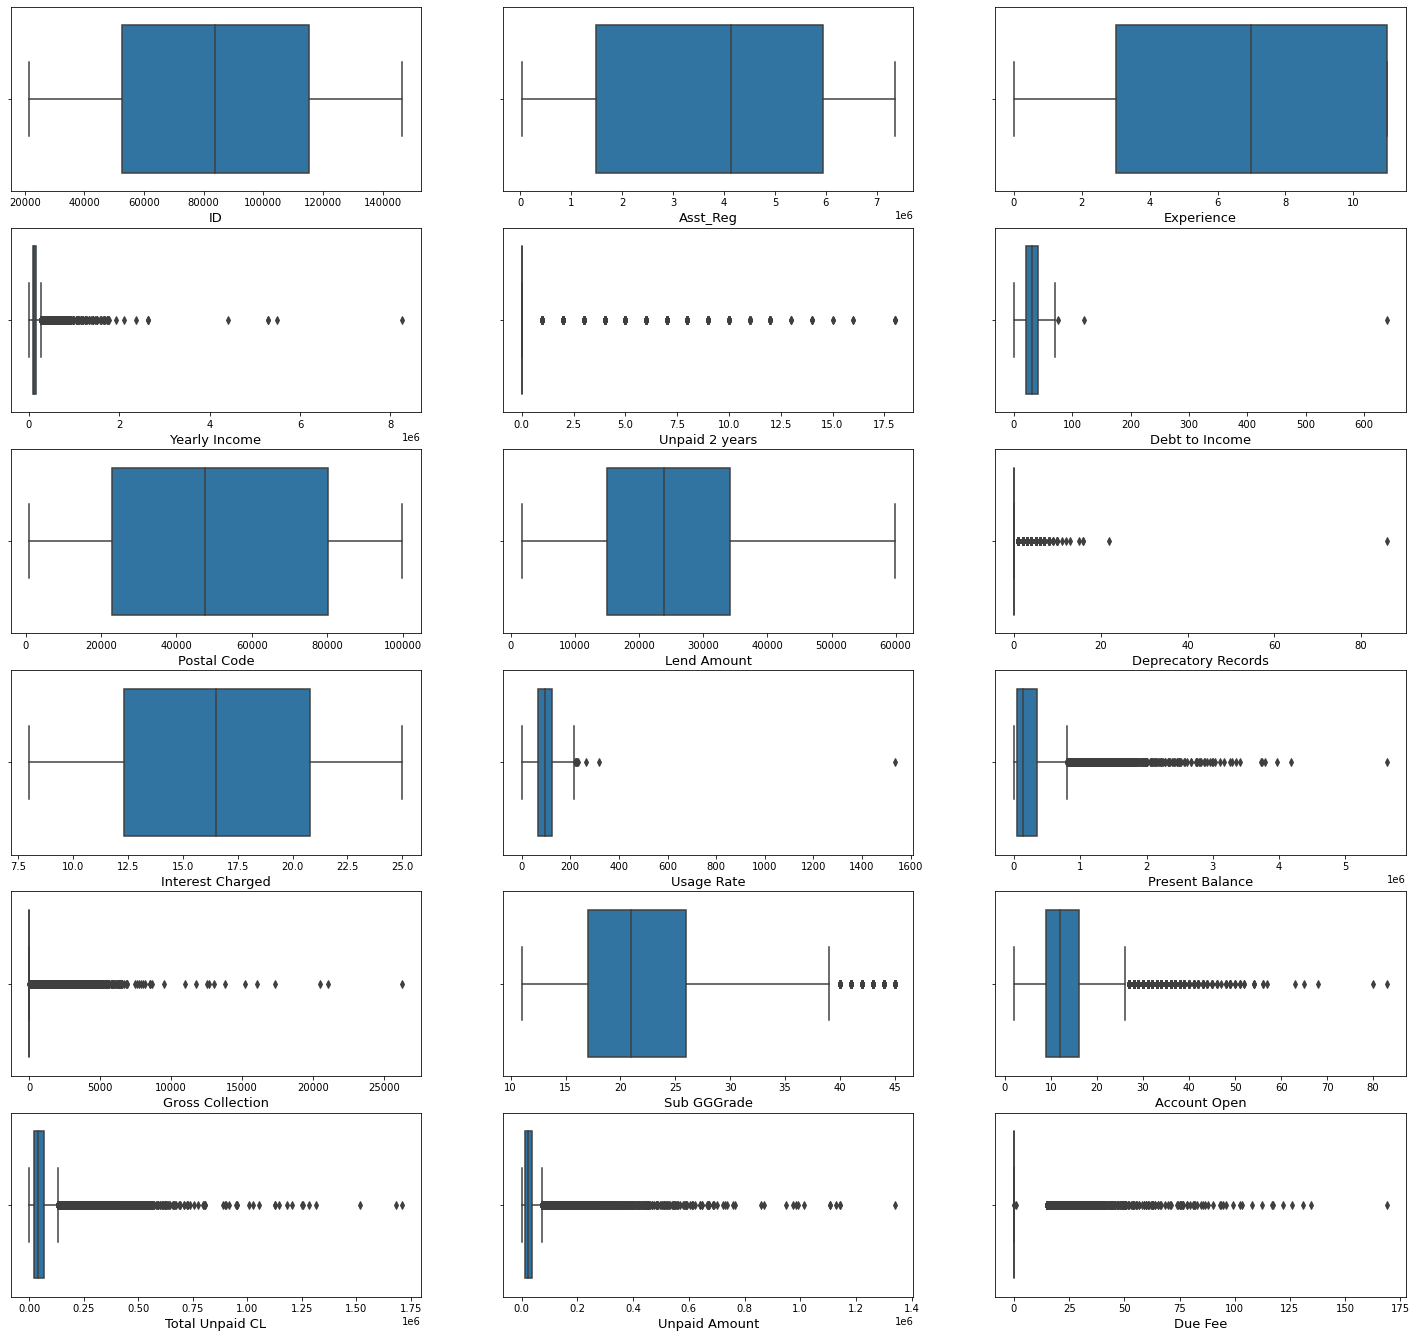

In [35]:
plt.figure(figsize=(25,40))
plot_num=1
for col in num_col.columns:
    ax=plt.subplot(10,3,plot_num)
    sns.boxplot(num_col[col])
    plt.xlabel(col,fontsize=13)
    plot_num+=1

**Interpretation:**
There are outliers present in lot of varibles

In [36]:
df_train_new = df_train.copy()

In [37]:
df_train.shape

(87490, 29)

**as `Debt to ratio`, `Deprecatory Records`, and `usage rate` are having extrem outliers, we will remove it using manual method**

In [38]:
value = df_train_new['Debt to Income'].quantile([.99999])
p = value.iloc[0]
df_train_new = df_train_new[df_train_new["Debt to Income"] < p]

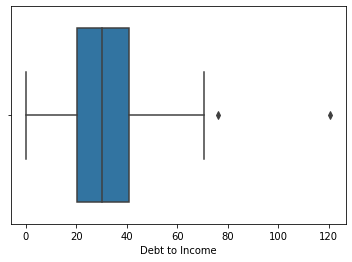

In [39]:
sns.boxplot(df_train_new['Debt to Income']);

In [40]:
value = df_train_new['Deprecatory Records'].quantile([.99999])
p = value.iloc[0]
df_train_new = df_train_new[df_train_new["Deprecatory Records"] < p]

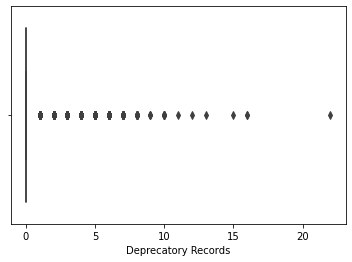

In [41]:
sns.boxplot(df_train_new['Deprecatory Records']);

In [42]:
value = df_train_new['Usage Rate'].quantile([.99999])
p = value.iloc[0]
df_train_new = df_train_new[df_train_new["Usage Rate"] < p]

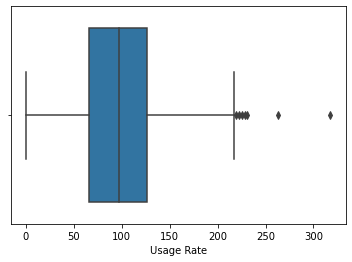

In [43]:
sns.boxplot(df_train_new['Usage Rate']);

In [44]:
df_train_new.shape

(83998, 29)

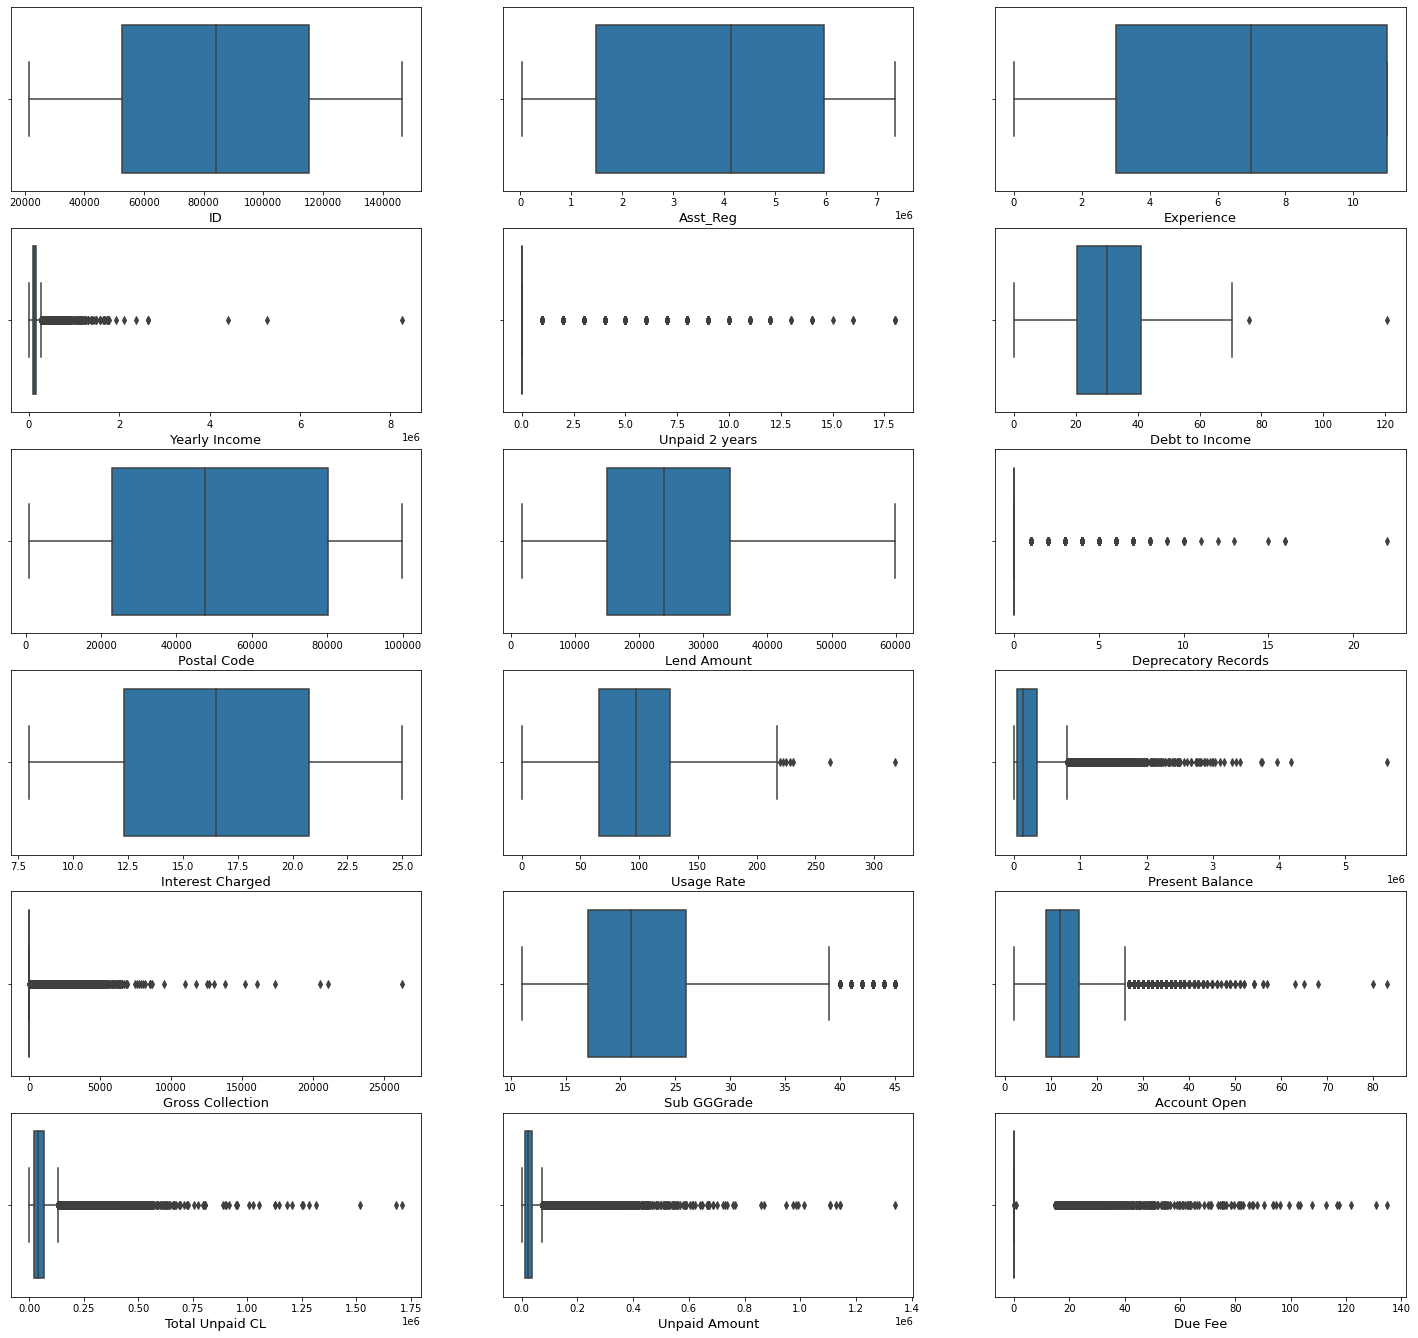

In [45]:
plt.figure(figsize=(25,40))
plot_num=1
for col in df_train_new.select_dtypes(np.number).columns:
    ax=plt.subplot(10,3,plot_num)
    sns.boxplot(df_train_new.select_dtypes(np.number)[col])
    plt.xlabel(col,fontsize=13)
    plot_num+=1

**Interpretation:**
There are some varibles with lot of outliers